In [1]:
from torch.utils.data import DataLoader
import dataloader_backup
from code.quadratic.interpolate import interpolate as qvi_interpolate
import matplotlib.pyplot as plt
import torchvision.transforms as TF
import torch
import numpy as np

In [29]:
dataset = dataloader_backup.adobe240_dataset()
dataset = dataloader_backup.TransformedDataset(dataset, random_crop=False, channels_first=True)

In [93]:
dl = DataLoader(dataset, batch_size=1)

In [94]:
for (x1,x2), y in dl:
    break

In [95]:
x1 = x1.cuda()
x2 = x2.cuda()
y = y.cuda()

In [96]:
x1.shape

torch.Size([1, 3, 720, 1280])

In [97]:
normalize1 = TF.Normalize([0.429, 0.431, 0.397], [1.0, 1.0, 1.0])
normalize2 = TF.Normalize([0, 0, 0], [1, 1, 1])
trans1 = TF.Compose([TF.ToPILImage(), TF.ToTensor(), normalize1, normalize2,])
trans2 = TF.Compose([normalize1, normalize2,])

In [98]:
x1.is_contiguous()

True

In [99]:
out = qvi_interpolate([x1, x2])

torch.Size([1, 3, 720, 1280]) True cuda:0
torch.Size([1, 3, 720, 1280]) True cuda:0


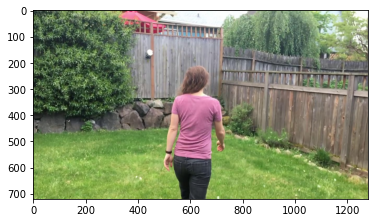

In [92]:
plt.imshow(out.detach().cpu().squeeze().permute(1,2,0).mul(255).clamp(0.255).int())